# Case Study 02

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


# 1. Find out how many males and females participated in the test.

In [5]:
gender=data["gender"].value_counts()
print('The number of males participated in the test is',gender["male"],'and that of females is',gender["female"])

The number of males participated in the test is 482 and that of females is 518


# 2. What do you think about the students' parental level of education?

In [6]:
parent_edu=data["parental level of education"].value_counts()
parent_edu

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

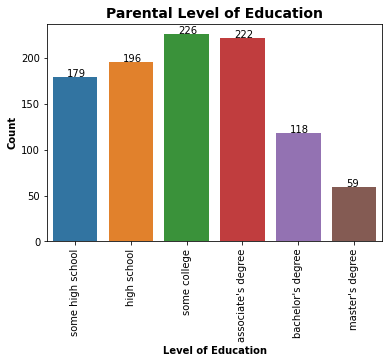

One out of every 5 parents have a associate's degree or are in some college. Only 6% of the parents have a masters degree.


In [7]:
import warnings
warnings.filterwarnings("ignore")

ax = sns.countplot(x= 'parental level of education',data = data)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.25))
plt.title('Parental Level of Education',fontsize=14,fontweight='bold')
plt.xlabel('Level of Education',fontsize=10,fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

print("One out of every 5 parents have a associate's degree or are in some college. Only 6% of the parents have a masters degree.")

# 3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

In [8]:
data_gender=data.groupby('gender')['math score','reading score','writing score'].mean()
data_testPreparationScore=data.groupby('test preparation course')['math score','reading score','writing score'].mean()
data_gender

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [61]:
data_testPreparationScore

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


Based on the test preparation course, those who completed the preparation course scored more than that who didn’t completed it/haven't taken up the course. Based on the gender, males scored better on Maths while they are behind the females on reading and writing scores.

# 4. What do you think about the scoring variation for math, reading and writing based on
● Gender
● Test preparation course

In [3]:
math1=data.groupby('gender')['math score'].describe()
math1

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.376448,16.029928,0.0,54.0,65.0,74.0,100.0
male,482.0,68.821577,14.556411,27.0,59.0,69.0,79.0,100.0


Text(0, 0.5, 'math score')

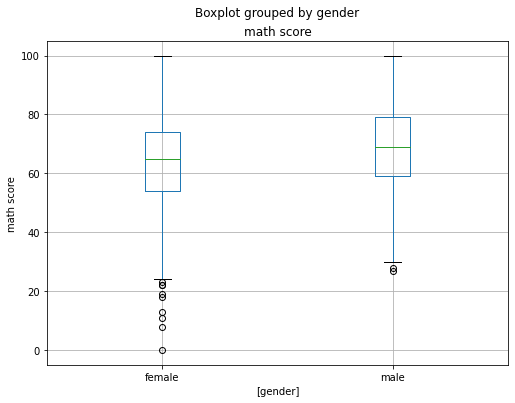

In [25]:
bx=data[['math score','gender']].boxplot(by='gender',figsize=(8,6))
bx.set_ylabel('math score')

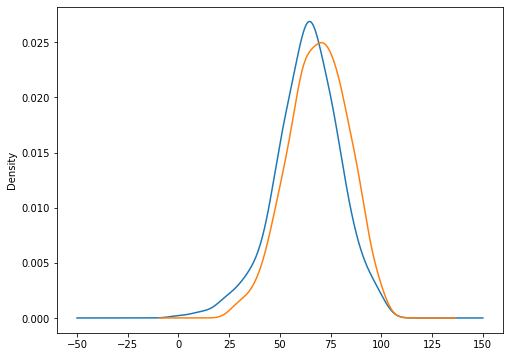

In [12]:
ax=data.groupby('gender')['math score'].plot(kind='density',figsize=(8,6))

In the case of math score for females, 50% of the females have a score of 65 or above while for males, it is 69 marks or above.
The maximum mark for maths is 100 for both males and females, the minimum mark scored by the females is 0 and that by males is 27.

In [5]:
read1=data.groupby('gender')['reading score'].describe()
read1

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.590734,14.411018,17.0,63.25,73.0,83.0,100.0
male,482.0,65.545643,14.149594,23.0,56.00,66.0,76.0,100.0


Text(0, 0.5, 'reading score')

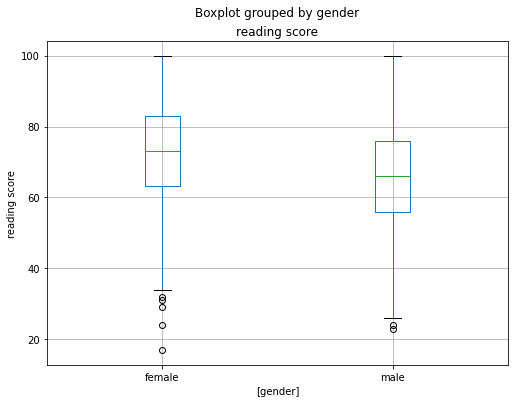

In [27]:
bx=data[['reading score','gender']].boxplot(by='gender',figsize=(8,6))
bx.set_ylabel('reading score')

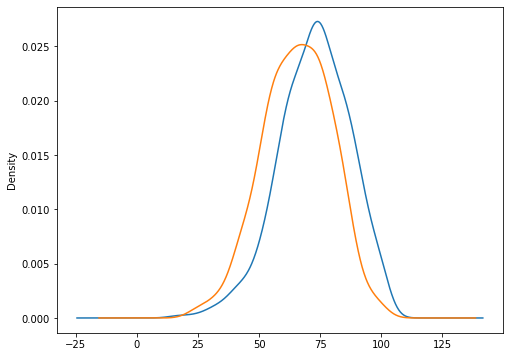

In [15]:
bx=data.groupby('gender')['reading score'].plot(kind='density',figsize=(8,6))

In the case of reading score for females, 25% of the females have a score of 83 or above while for males, it is 76 marks or above. The maximum mark for maths is 100 for both males and females, the minimum mark scored by the females is 17 and that by males is 23.

In [102]:
write1=data.groupby('gender')['writing score'].describe()
write1

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.0,100.0
male,482.0,63.446058,14.227225,15.0,53.0,64.0,74.0,100.0


Text(0, 0.5, 'writing score')

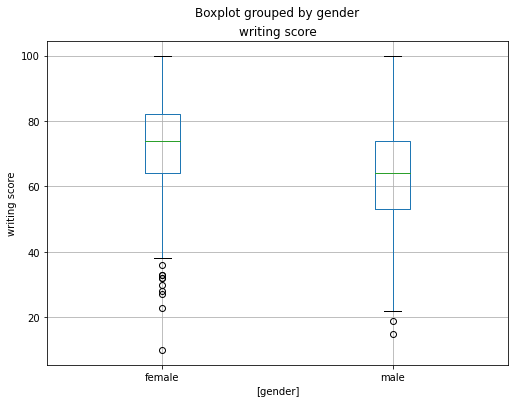

In [28]:
bx=data[['writing score','gender']].boxplot(by='gender',figsize=(8,6))
bx.set_ylabel('writing score')

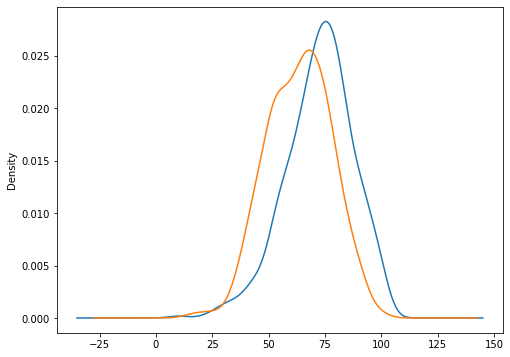

In [16]:
cx=data.groupby('gender')['writing score'].plot(kind='density',figsize=(8,6))

In the case of writing score for females, 25% of the females have a score of 82 or above while for males, it is 74 marks or above. The maximum mark for maths is 100 for both males and females, the minimum mark scored by the females is 10 and that by males is 15.

In [104]:
math2=data.groupby('test preparation course')['math score'].describe()
math2

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,69.96648,14.521847,23.0,61.0,70.0,79.0,100.0
none,642.0,63.78972,15.705689,0.0,54.0,64.0,74.0,100.0


Text(0, 0.5, 'math score')

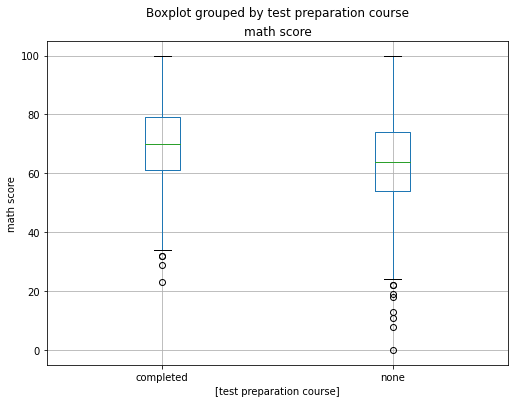

In [26]:
cx=data[['math score','test preparation course']].boxplot(by='test preparation course',figsize=(8,6))
cx.set_ylabel('math score')

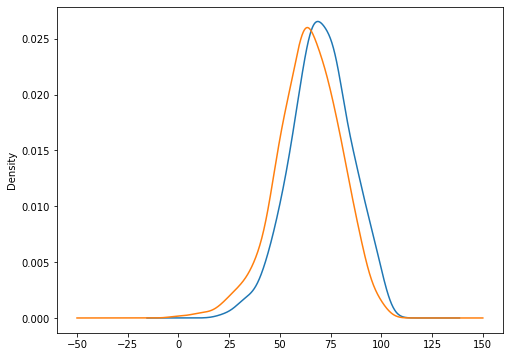

In [17]:
aax=data.groupby('test preparation course')['math score'].plot(kind='density',figsize=(8,6))

In the case of maths score for students who completed the test preparation course, 25% of the students have a score of 79 or above while for others who haven't taken the course, it is 74 marks or above. The maximum mark for maths is 100 for both the category of students, the minimum mark scored by the students who completed the test preparation course is 23 and that by other category is 0.

In [105]:
read2=data.groupby('test preparation course')['reading score'].describe()
read2

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,74.175978,13.537572,37.0,66.0,75.0,84.0,100.0
none,642.0,66.417445,14.608896,17.0,57.0,67.0,76.0,100.0


Text(0, 0.5, 'reading score')

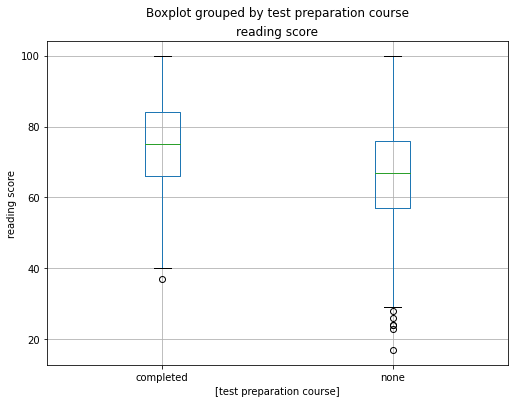

In [29]:
cx=data[['reading score','test preparation course']].boxplot(by='test preparation course',figsize=(8,6))
cx.set_ylabel('reading score')

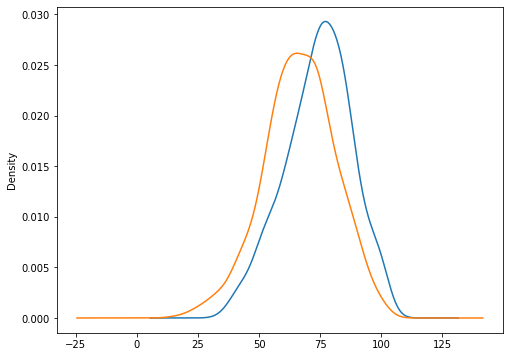

In [18]:
bbx=data.groupby('test preparation course')['reading score'].plot(kind='density',figsize=(8,6))

In the case of reading score for students who completed the test preparation course, 25% of the students have a score of 84 or above while for others who haven't taken the course, it is 76 marks or above. The maximum mark for reading is 100 for both the category of students, the minimum mark scored by the students who completed the test preparation course is 37 and that by other category is 17.

In [106]:
write2=data.groupby('test preparation course')['writing score'].describe()
write2

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,74.684358,13.236412,36.0,67.0,76.0,83.75,100.0
none,642.0,64.457944,15.041667,10.0,54.0,65.0,74.00,100.0


Text(0, 0.5, 'writing score')

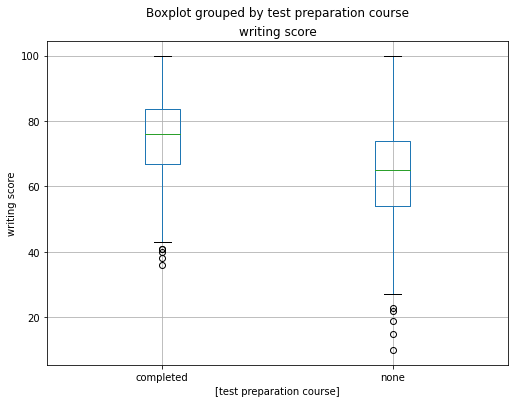

In [30]:
cx=data[['writing score','test preparation course']].boxplot(by='test preparation course',figsize=(8,6))
cx.set_ylabel('writing score')

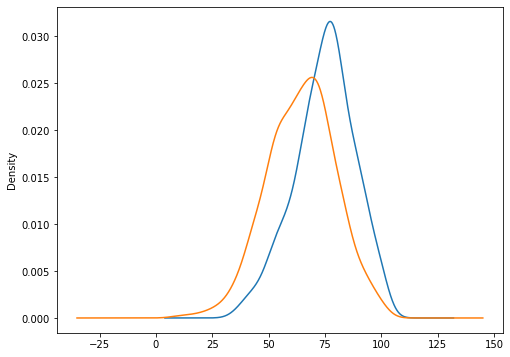

In [19]:
ccx=data.groupby('test preparation course')['writing score'].plot(kind='density',figsize=(8,6))

In the case of writing score for students who completed the test preparation course, 25% of the students have a score of 83.75 or above while for others  who haven't taken the course, it is 74 marks or above. The maximum mark for reading is 100 for both the category of students, the minimum mark scored by the students who completed the test preparation course is 36 and that by other category is 10.

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [66]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


Top 25% students in maths have a score of 77 or above.

In [18]:
top25=data[(data['math score']>=77.000000)]
gender_topp25=top25["gender"].value_counts()
print('There are',len(top25),'students who belong to the top 25% category with a score of 77 or above in maths. Out of this',gender_topp25['male'],'are male and\n',gender_topp25['female'],'are females.')

There are 255 students who belong to the top 25% category with a score of 77 or above in maths. Out of this 151 are male and
 104 are females.
